# Reading FC Goakeeper Analysis

- Taking League one Goalkeepers and seeing where Reading FC Goalkeeper rank amognst them

In [1]:
import pandas as pd

# Importing the league one GK players dataset

df = pd.read_csv('GK_TopPerformers.csv')
df.head(20)


,Name,Age,Rating,Market_Value,Season,League,Club,League_Position,Appearances,Position_Region,Position,Height,Save%,Clean_Sheets,Conceded/90,Passes/90,Pass%,Sweeps/90,Claims/90,Goals_Prevented
0,Ryan Allsop,32,7.05,1000000,24/25,League one,Birmingham,1,38,Goalkeeper,GK,1.89,75.90,21,0.45,43.57,73.33,0.55,0.61,7.15
1,Arthur Okonkwo,23,7.13,1200000,24/25,League one,Wrexham,2,33,Goalkeeper,GK,1.98,77.23,19,0.64,23.44,49.20,0.24,1.24,5.00
2,Corey Addai,27,6.98,175000,24/25,League one,Stockport,3,31,Goalkeeper,GK,2.03,66.30,10,1.00,34.76,64.90,0.57,0.96,-0.99
3,William Mannion,27,6.87,200000,24/25,League one,Charlton,4,31,Goalkeeper,GK,1.91,65.82,15,0.82,23.20,52.50,0.58,1.31,-3.29
4,Franco Ravizzoli,27,6.90,300000,24/25,League one,Wycombe,5,28,Goalkeeper,GK,1.88,70.93,9,0.86,38.26,55.86,0.70,0.56,2.25
5,Josh Keeley,22,6.70,300000,24/25,League one,Leyton Orient,6,39,Goalkeeper,GK,1.91,75.40,16,0.94,33.06,56.90,1.08,0.78,9.72
6,Will Norris,30,7.14,400000,23/24,League one,Portsmouth,1,46,Goalkeeper,GK,1.95,71.92,19,0.83,41.40,64.09,0.35,1.17,-5.29
7,Joe Wildsmith,28,6.90,500000,23/24,League one,Derby,2,40,Goalkeeper,GK,1.89,70.48,20,0.68,29.69,61.71,0.38,0.81,-0.14
8,Nathan Baxter,25,6.83,600000,23/24,League one,Bolton,3,26,Goalkeeper,GK,1.93,60.55,6,1.50,33.62,69.34,0.21,0.82,1.13
9,Nicholas Bilokapic,21,6.40,400000,23/24,League one,Peterborough,4,28,Goalkeeper,GK,1.94,64.00,10,1.32,35.01,79.90,0.11,0.73,-10.24


In [2]:
# Normalize counting stats to a 46-game season as some players I have, have played different amount of games
# Per-game stats (multiply by 46)
per_game_cols = [
    'Conceded/90', 'Passes/90', 'Sweeps/90', 'Claims/90'
]
for col in per_game_cols:
    df[f'{col}_46g'] = df[col] * 46

# Counting stats (scale to 46 games)
counting_stats = ['Clean_Sheets', 'Goals_Prevented']
for col in counting_stats:
    df[f'{col}_46g'] = df[col] / df['Appearances'] * 46

In [3]:
# Map positions to specific roles 
position_role_map = {
    'GK': 'Goalkeeper'
}
df['player_role'] = df['Position'].map(position_role_map)

In [4]:
# Mapping metrics per position (I.e, not interested in defensive stats for a striker and vice versa)

position_metrics = {
    'Goalkeeper': ['Age', 'Rating', 'Market_Value', 'Height', 'Save%', 'Clean_Sheets_46g', 'Conceded/90', 'Passes/90', 'Pass%', 'Sweeps/90', 'Claims/90', 'Goals_Prevented_46g']
}

In [5]:
# Generate benchmarks 
benchmarks = {}

for role, metrics in position_metrics.items():
    role_df = df[df['player_role'] == role]
    if not role_df.empty:
        stats = role_df[metrics].describe(percentiles=[0.25, 0.5, 0.75]).T
        stats = stats[['25%', '50%', '75%']].rename(columns={
            '25%': 'Min Benchmark',
            '50%': 'Typical Benchmark',
            '75%': 'High Benchmark'
        })
        benchmarks[role] = stats

# Output benchmarks 
for role, table in benchmarks.items():
    print(f"\n🔹 {role} Benchmarks (Normalized to 46 games):")
    print(table)
    table.to_csv(f'{role}_benchmarks_46g.csv')


🔹 Goalkeeper Benchmarks (Normalized to 46 games):
                     Min Benchmark  Typical Benchmark  High Benchmark
Age                      23.250000          27.000000       28.750000
Rating                    6.837500           6.900000        7.072500
Market_Value         300000.000000      450000.000000  1000000.000000
Height                    1.890000           1.915000        1.950000
Save%                    66.547500          70.340000       75.775000
Clean_Sheets_46g         15.109801          18.935897       22.076527
Conceded/90               0.775000           0.900000        1.052500
Passes/90                29.977500          33.225000       35.007500
Pass%                    56.120000          63.475000       69.042500
Sweeps/90                 0.267500           0.370000        0.577500
Claims/90                 0.740000           0.820000        1.130000
Goals_Prevented_46g      -5.187984           1.419365        5.926680


In [6]:
df = pd.read_csv('ReadingFC_GKs.csv')

# Normalize the 'League' column
df['League'] = df['League'].astype(str).str.strip().str.lower()

# Filter for League one
rfc_gk = df[df['League'].str.contains('league one', case=False, na=False)].copy()

# Normalise Goals and Assists to a 46-game season
rfc_gk['Appearances'] = rfc_gk['Appearances'].replace(0, 1)
rfc_gk['Clean_Sheets_46g'] = (rfc_gk['Clean_Sheets'] / rfc_gk['Appearances']) * 46
rfc_gk[['Clean_Sheets_46g']] = rfc_gk[['Clean_Sheets']].round(2)
rfc_gk['Goals_Prevented_46g'] = (rfc_gk['Goals_Prevented'] / rfc_gk['Appearances']) * 46
rfc_gk[['Goals_Prevented_46g']] = rfc_gk[['Goals_Prevented']].round(2)

# Display the results
print(rfc_gk[['Name', 'Age', 'Rating', 'Market_Value', 'League', 'Appearances', 'Height', 'Save%', 'Clean_Sheets_46g', 'Conceded/90', 'Passes/90', 'Pass%', 'Sweeps/90', 'Claims/90', 'Goals_Prevented_46g']].head(10))

           Name  Age  Rating  Market_Value      League  Appearances  Height  \
0  Joel Pereira   28    7.29        275000  league one           40    1.89   
1  David Button   35    6.88        125000  league one           37    1.91   
2  Jack Stevens   26    6.96        175000  league one           33    1.88   

   Save%  Clean_Sheets_46g  Conceded/90  Passes/90  Pass%  Sweeps/90  \
0  74.44                13         1.05      32.87  64.98       0.20   
1  61.81                 8         1.29      34.41  66.42       0.49   
2  68.06                10         1.38      36.62  42.63       0.55   

   Claims/90  Goals_Prevented_46g  
0       1.03                 9.06  
1       0.88                -8.35  
2       1.48                -0.14  


In [7]:
import pandas as pd

# Load dataset and filter to League One
df2 = pd.read_csv('ReadingFC_GKs.csv')
df2['League'] = df['League'].astype(str).str.strip().str.lower()
league_one_df = df[df['League'] == 'league one']


In [8]:
rfc_gk['Appearances'] = rfc_gk['Appearances'].replace(0, 1)
rfc_gk['Clean_Sheets_46g'] = (rfc_gk['Clean_Sheets'] / rfc_gk['Appearances']) * 46
rfc_gk[['Clean_Sheets_46g']] = rfc_gk[['Clean_Sheets_46g']].round(2)
rfc_gk['Goals_Prevented_46g'] = (rfc_gk['Goals_Prevented'] / rfc_gk['Appearances']) * 46
rfc_gk[['Goals_Prevented_46g']] = rfc_gk[['Goals_Prevented_46g']].round(2)

In [9]:
position_role_map = {
    'GK': 'Goalkeeper'
}
rfc_gk['player_role'] = rfc_gk['Position'].map(position_role_map)

In [10]:
role_metrics = {
    'Goalkeeper': ['Age', 'Rating', 'Market_Value', 'Height', 'Save%', 'Clean_Sheets_46g', 'Conceded/90', 'Passes/90', 'Pass%', 'Sweeps/90', 'Claims/90', 'Goals_Prevented_46g']
}

In [11]:
def compare_to_benchmark(player_val, benchmark_val):
    if pd.isna(player_val) or pd.isna(benchmark_val):
        return 'No Data'
    elif player_val < benchmark_val:
        return 'Below Benchmark'
    elif player_val == benchmark_val:
        return 'Meets Benchmark'
    else:
        return 'Exceeds Benchmark'

In [12]:
results = []

for role, metrics in role_metrics.items():
    try:
        benchmark_df = pd.read_csv(f"{role}_benchmarks_46g.csv", index_col=0)
        benchmarks = benchmark_df['Typical Benchmark']
    except FileNotFoundError:
        print(f"Benchmark file not found for role: {role}")
        continue

    players_in_role = rfc_gk[rfc_gk['player_role'] == role]

    for _, row in players_in_role.iterrows():
        comparison = {
            'Name': row['Name'],
            'Role': role
        }
        for metric in metrics:
            player_val = row.get(metric)
            benchmark_val = benchmarks.get(metric)
            comparison[f'{metric}_Actual'] = player_val
            comparison[f'{metric}_Benchmark'] = benchmark_val
            comparison[f'{metric}_Comparison'] = compare_to_benchmark(player_val, benchmark_val)
        results.append(comparison)

comparison_df = pd.DataFrame(results)

In [13]:
from IPython.display import display
pd.set_option('display.max_columns', None)  # See all columns
display(comparison_df.head())

,Name,Role,Age_Actual,Age_Benchmark,Age_Comparison,Rating_Actual,Rating_Benchmark,Rating_Comparison,Market_Value_Actual,Market_Value_Benchmark,Market_Value_Comparison,Height_Actual,Height_Benchmark,Height_Comparison,Save%_Actual,Save%_Benchmark,Save%_Comparison,Clean_Sheets_46g_Actual,Clean_Sheets_46g_Benchmark,Clean_Sheets_46g_Comparison,Conceded/90_Actual,Conceded/90_Benchmark,Conceded/90_Comparison,Passes/90_Actual,Passes/90_Benchmark,Passes/90_Comparison,Pass%_Actual,Pass%_Benchmark,Pass%_Comparison,Sweeps/90_Actual,Sweeps/90_Benchmark,Sweeps/90_Comparison,Claims/90_Actual,Claims/90_Benchmark,Claims/90_Comparison,Goals_Prevented_46g_Actual,Goals_Prevented_46g_Benchmark,Goals_Prevented_46g_Comparison
0,Joel Pereira,Goalkeeper,28,27.0,Exceeds Benchmark,7.29,6.9,Exceeds Benchmark,275000,450000.0,Below Benchmark,1.89,1.915,Below Benchmark,74.44,70.34,Exceeds Benchmark,14.95,18.935897,Below Benchmark,1.05,0.9,Exceeds Benchmark,32.87,33.225,Below Benchmark,64.98,63.475,Exceeds Benchmark,0.20,0.37,Below Benchmark,1.03,0.82,Exceeds Benchmark,10.42,1.419365,Exceeds Benchmark
1,David Button,Goalkeeper,35,27.0,Exceeds Benchmark,6.88,6.9,Below Benchmark,125000,450000.0,Below Benchmark,1.91,1.915,Below Benchmark,61.81,70.34,Below Benchmark,9.95,18.935897,Below Benchmark,1.29,0.9,Exceeds Benchmark,34.41,33.225,Exceeds Benchmark,66.42,63.475,Exceeds Benchmark,0.49,0.37,Exceeds Benchmark,0.88,0.82,Exceeds Benchmark,-10.38,1.419365,Below Benchmark
2,Jack Stevens,Goalkeeper,26,27.0,Below Benchmark,6.96,6.9,Exceeds Benchmark,175000,450000.0,Below Benchmark,1.88,1.915,Below Benchmark,68.06,70.34,Below Benchmark,13.94,18.935897,Below Benchmark,1.38,0.9,Exceeds Benchmark,36.62,33.225,Exceeds Benchmark,42.63,63.475,Below Benchmark,0.55,0.37,Exceeds Benchmark,1.48,0.82,Exceeds Benchmark,-0.20,1.419365,Below Benchmark


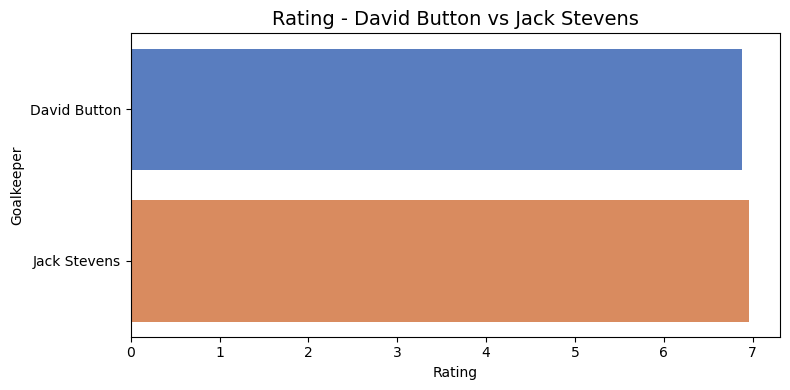

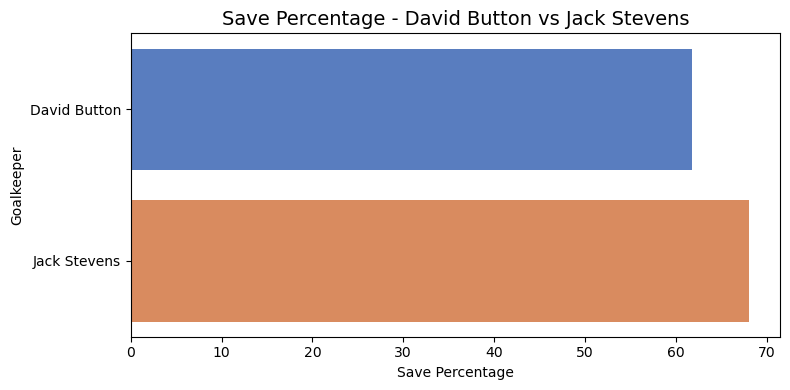

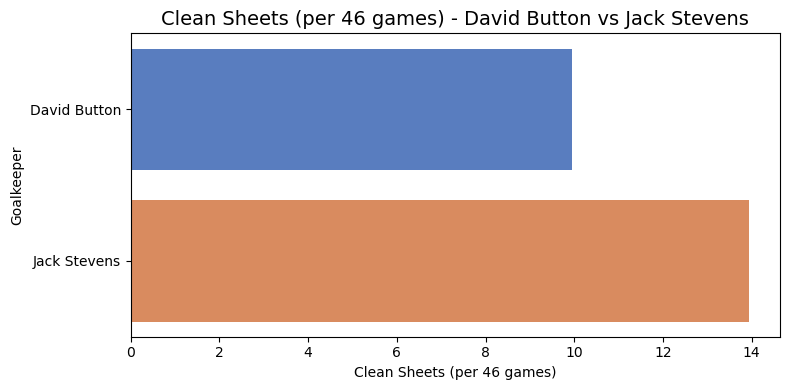

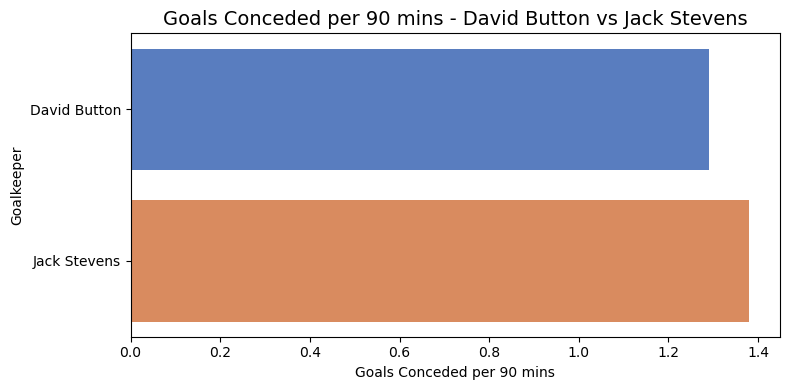

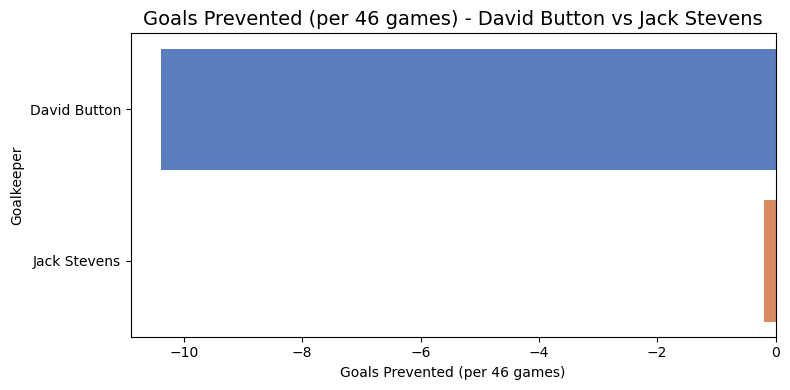

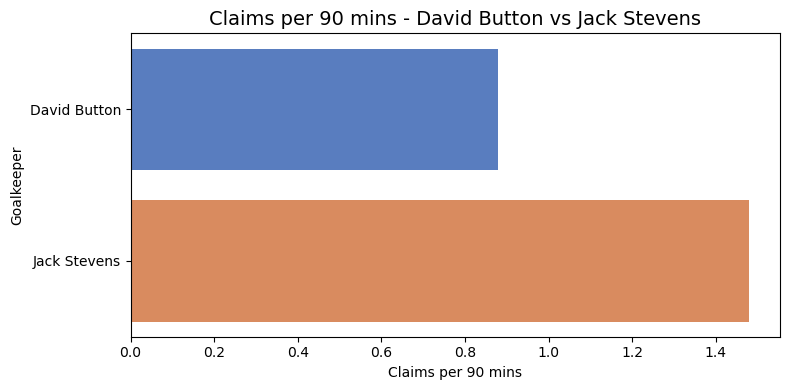

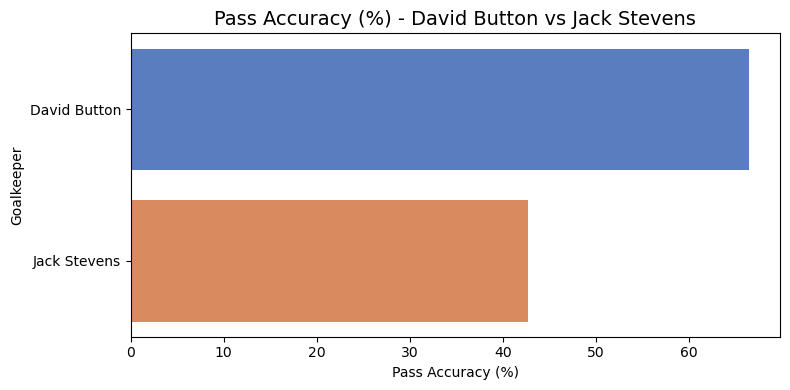

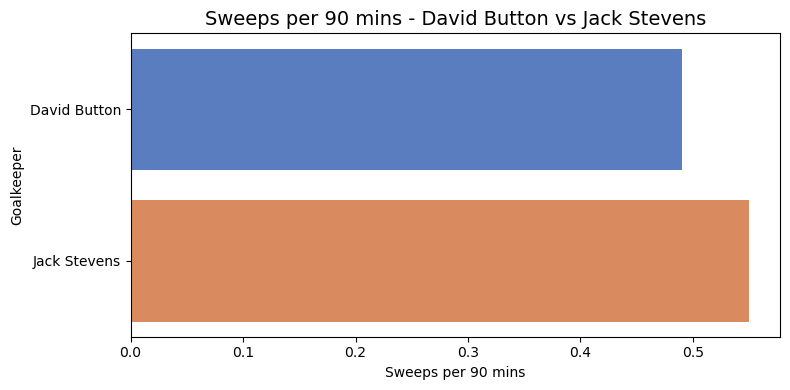

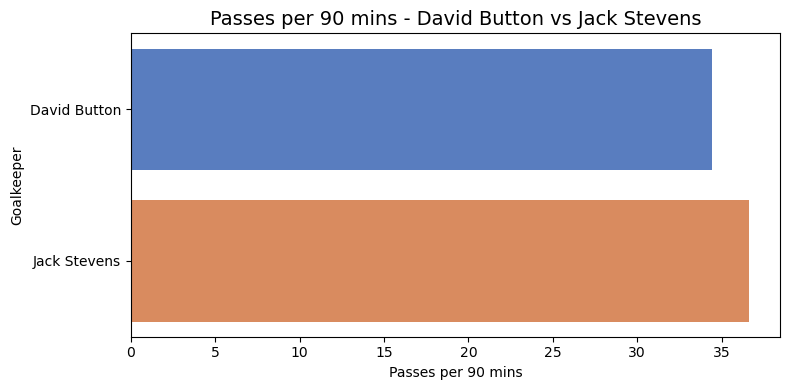

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# For nice plots in Jupyter
%matplotlib inline

# Define which columns you want to plot
stats = [
    'Rating_Actual', 'Save%_Actual', 'Clean_Sheets_46g_Actual', 
    'Conceded/90_Actual', 'Goals_Prevented_46g_Actual', 
    'Claims/90_Actual', 'Pass%_Actual', 'Sweeps/90_Actual', 'Passes/90_Actual'
]

# Define readable titles for each stat
stat_labels = {
    'Rating_Actual': 'Rating',
    'Save%_Actual': 'Save Percentage',
    'Clean_Sheets_46g_Actual': 'Clean Sheets (per 46 games)',
    'Conceded/90_Actual': 'Goals Conceded per 90 mins',
    'Goals_Prevented_46g_Actual': 'Goals Prevented (per 46 games)',
    'Claims/90_Actual': 'Claims per 90 mins',
    'Pass%_Actual': 'Pass Accuracy (%)',
    'Sweeps/90_Actual': 'Sweeps per 90 mins',
    'Passes/90_Actual': 'Passes per 90 mins'
}

# Filter to just David Button and Joel Pereira
filtered_df = comparison_df[comparison_df['Name'].isin(['David Button', 'Jack Stevens'])]

# Loop through each stat and generate bar chart for just the two players
for stat in stats:
    plt.figure(figsize=(8, 4))
    sns.barplot(data=filtered_df, x=stat, y='Name', palette='muted')
    plt.title(f'{stat_labels[stat]} - David Button vs Jack Stevens', fontsize=14)
    plt.xlabel(stat_labels[stat])
    plt.ylabel('Goalkeeper')
    plt.tight_layout()
    plt.show()


